## Reanalysis method - 26.06.2018

In [83]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
fn = "C:/Users/Apo's_PC/Desktop/GFD/Task 7/eanalysis_dailymeans_20180626.nc"
ds = nc.Dataset(fn)
lat = ds.variables['latitude'][:]  # latitude
lon = ds.variables['longitude'][:] # longitude
t = ds.variables['time'][:] # time
h = np.array(ds.variables['depth'][:]) # height
sob = ds.variables['sob'][:] 
t = ds.variables['bottomT'][:] 
mlotst = ds.variables['mlotst'][:] 
so = ds.variables['so'][:] 
T = ds.variables['thetao'][:] 
u = ds.variables['uo'][:] 
v = ds.variables['vo'][:] 


<ipython-input-84-9a46fedd8d10>:17: RuntimeWarning: Mean of empty slice
  rho_a[j] = np.nanmean(rho[j,:])
<ipython-input-84-9a46fedd8d10>:18: RuntimeWarning: Mean of empty slice
  temp_a[j] = np.nanmean(temp[j,:])
<ipython-input-84-9a46fedd8d10>:19: RuntimeWarning: Mean of empty slice
  sal_a[j] = np.nanmean(sal[j,:])


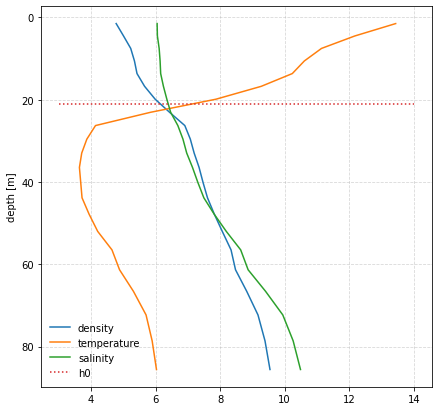

In [84]:
i_in = lon[255]
j_in = lat[329]
h_f = h[24] 
temp = np.array(T[0,:24,329:346,255])
# temp = np.ma.getdata(temp)
# temp[np.isnan(temp)] = 0
sal = np.array(so[0,:24,329:346,255])

rho=(1028*(1-1.7*10**-4*(temp - 10) + 7.6*10**-4 *(sal- 35)))
rho = (rho - 1000)

rho_a = np.zeros(24)
temp_a =np.zeros(24)
sal_a = np.zeros(24)

for j in range (24):
    rho_a[j] = np.nanmean(rho[j,:])
    temp_a[j] = np.nanmean(temp[j,:])
    sal_a[j] = np.nanmean(sal[j,:])

x = [3,14]
h0 = [21,21]     

fig,ax = plt.subplots(1, 1 , figsize=(7, 7))
ax.plot(rho_a, h[0:24], label = "density")
ax.plot(temp_a, h[0:24], label = 'temperature')
ax.plot(sal_a, h[0:24], label = 'salinity')
ax.plot(x,h0, ':', label = 'h0')
ax.invert_yaxis()
ax.legend(frameon=False)
ax.grid(which="both", ls="--", alpha=0.5)
ax.set_ylabel("depth [m]")
fig.savefig('Thermocline.png', dpi=300)



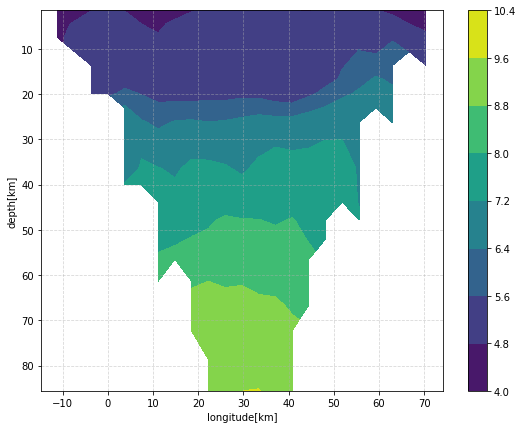

In [85]:
temp = np.array(T[0,0:22,317:342,255])
sal = np.array(so[0,0:22,317:342,255])
rho=(1028*(1-1.7*10**-4*(temp - 10) + 7.6*10**-4 *(sal- 35)))
rho = (rho - 1000)

fig,ax = plt.subplots(1, 1 , figsize=(9, 7))
a = ax.contourf((lat[317:342]-lat[321])*60*1.852, h[0:22], rho)
ax.invert_yaxis()
ax.grid(which="both", ls="--", alpha=0.5)
ax.set_xlabel('longitude[km]')
ax.set_ylabel('depth[km]')
fig.colorbar(a)

## Reanalysis method - 03.07.2018

In [86]:
fn = "C:/Users/Apo's_PC/Desktop/GFD/Task 7/CMEMS_BAL_PHY_reanalysis_dailymeans_20180703.nc"
ds = nc.Dataset(fn)
lat = ds.variables['latitude'][:]  # latitude
lon = ds.variables['longitude'][:] # longitude
t = ds.variables['time'][:] # time
h = np.array(ds.variables['depth'][:]) # height
sob = ds.variables['sob'][:] 
t = ds.variables['bottomT'][:] 
mlotst = ds.variables['mlotst'][:] 
so = ds.variables['so'][:] 
T = ds.variables['thetao'][:] 
u = ds.variables['uo'][:] 
v = ds.variables['vo'][:] 

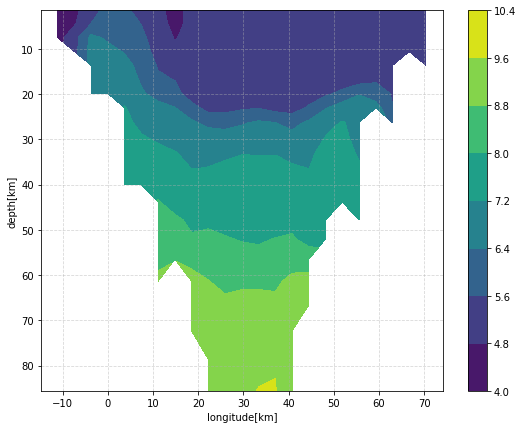

In [87]:
temp = np.array(T[0,0:22,317:342,255])
sal = np.array(so[0,0:22,317:342,255])
rho=(1028*(1-1.7*10**-4*(temp - 10) + 7.6*10**-4 *(sal- 35)))
rho = (rho - 1000)

fig,ax = plt.subplots(1, 1 , figsize=(9, 7))
a = ax.contourf((lat[317:342]-lat[321])*60*1.852, h[0:22], rho)
ax.invert_yaxis()
ax.grid(which="both", ls="--", alpha=0.5)
fig.colorbar(a)
ax.set_xlabel('longitude[km]')
ax.set_ylabel('depth[km]')
fig.savefig('Reanalysis 03.07.2018.png', dpi=300)

## Windimpulse method

In [88]:
fn = "C:/Users/Apo's_PC/Desktop/GFD/Task2/download.nc"
ds = nc.Dataset(fn)
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time'][:]
t = ds.variables['t2m'][:] # 2 meter temperature
mslp = ds.variables['msl'][:] # mean sea level pressure
u = ds.variables['u10'][:] # 10m u-component of winds
v = ds.variables['v10'][:] # 10m v-component of winds
t_i = 4296
t_f = 4320
u_a = np.zeros(5)
v_a = np.zeros(5)
u_a = np.nanmean(u[4296:4320,:,4]) #average velocity for day 4 of week
v_a= np.nanmean(v[4296:4320,:,4])  #average velocity for day 4 of week
U = (u_a**2 + v_a**2)**0.5
c = 0.0015 # drag coefficient
rho_air = 1.225 #air density
w_stress = c * rho_air * U * u_a #windstress
d_rho = 3
g = 9.81
rho_0 = 1028
gprime = g * d_rho / rho_0 # reduced gracity
I = 1/(1028*21)*w_stress*7*24*60*60 # windimpulse
f = 0.0001
d = I/f - (gprime*21)**0.5/f
d


18761.923001213567